# Bridge Scoring

We are a bunch of 9 friends who come together Tuesday nights to hang around, have a bit of fun and play bridge.  Lately, we have started to keep score on the matches we played.  This notebook is mostly for fun and also to determine who will pay for the dinner next time we go out.

The scores are kept in the scores.csv file and is updated after each game.

In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_scores = pd.read_csv('scores.csv', parse_dates=[0], infer_datetime_format=True)

In [3]:
raw_scores

,date,team1,team2,imp1,imp2,hands_played
0,2022-03-22,muzo-eray-kazim-serhan,izzet-cuneyt-erol-alper,7,16,8
1,2022-03-22,izzet-eray-serhan-erol,muzo-alper-kazim-cuneyt,21,16,8
2,2022-03-19,izzet-erol-alper-zerrin,murat-eray-cuneyt-serhan,45,0,8
3,2022-03-19,izzet-serhan-erol-zerrin,murat-alper-eray-cuneyt,5,35,8
4,2022-03-19,eray-alper-serhan-zerrin,cuneyt-murat-erol-izzet,25,8,8
5,2022-03-15,izzet-eray-erol-alper,serhan-muzo-cuneyt-murat,5,2,6
6,2022-03-15,alper-eray-izzet-cuneyt,erol-muzo-murat-serhan,6,8,8
7,2022-03-08,guzide-eray-yusuf-zerrin,muzo-alper-serhan-erol,1,25,8
8,2022-03-01,izzet-eray-serhan-murat,alper-muzo-cuneyt-erol,1,19,8
9,2022-03-01,muzo-eray-alper-cuneyt,izzet-serhan-erol-kazim,26,1,8


In [4]:
raw_scores.dtypes

date            datetime64[ns]
team1                   object
team2                   object
imp1                     int64
imp2                     int64
hands_played             int64
dtype: object

In [5]:
def win_or_lose(score1: int, score2: int) -> tuple[str, str]:
    if score1 > score2:
        return 'W', 'L'
    elif score1 == score2:
        return 'D', 'D'
    else:
        return 'L', 'W'
    
def player_stats(data, df, func, columns, index):
    '''
    calculates player statistics via func function
    '''
    
    for i in range(len(data)):
        team1_members = list(data.iloc[i].team1.split('-'))
        team2_members = list(data.iloc[i].team2.split('-'))

        # team1 and team2 are the same length
        for j in range(len(team1_members)):
            team1_result, team2_result = func(data.iloc[i].imp1, data.iloc[i].imp2)
            team1_series = pd.Series([data.iloc[i].date, 
                                      team1_members[j],
                                      data.iloc[i].imp1, 
                                      team1_result],
                                    name='team1')
            team2_series = pd.Series([data.iloc[i].date, 
                                      team2_members[j], 
                                      data.iloc[i].imp2,
                                      team2_result],
                                    name='team2')
            df = pd.concat([df, team1_series.to_frame('team1').T, team2_series.to_frame('team2').T], ignore_index=True)

    df.columns = columns
    df.set_index(index, inplace=True)
    
    return df

In [6]:
scores = pd.DataFrame()
columns = ['date', 'player', 'score', 'result']
scores = player_stats(raw_scores, scores, win_or_lose, columns, columns[0])
scores

,player,score,result
date,,,
2022-03-22,muzo,7,L
2022-03-22,izzet,16,W
2022-03-22,eray,7,L
2022-03-22,cuneyt,16,W
2022-03-22,kazim,7,L
...,...,...,...
2021-10-26,kazim,32,W
2021-10-26,murat,15,L
2021-10-26,alper,32,W


Graph the win/loss streaks for each player

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
#%config InlineBackend.figure_format='retina'

In [8]:
scores.loc[scores['result'] == "W", "wins"] = 1
scores.loc[scores['result'] == "D", "draws"] = 0.4
scores.loc[scores['result'] == "L", "losses"] = -1

In [9]:
def plot_win_lose_streaks(player):
    fig, ax = plt.subplots(figsize=(10,1))
    # add a horizontal line at y=0
    plt.axhline(y=0, color='black', linewidth=3)
    
    # separate wins, draws and losses for so we can show them in different colors
    scores[scores['player']==player]['wins'].plot.bar(ax=ax, color='green', width=1)
    scores[scores['player']==player]['losses'].plot.bar(ax=ax, color='red', width=1)
    scores[scores['player']==player]['draws'].plot.bar(ax=ax, color='grey', width=1, bottom=-0.2)
    
    plt.title(player, loc='left')

    ax.tick_params(bottom=False, labelbottom=False)
    plt.gca().invert_xaxis()

    plt.show()

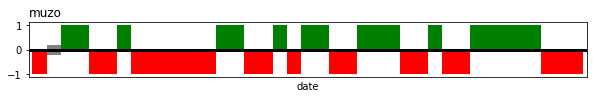

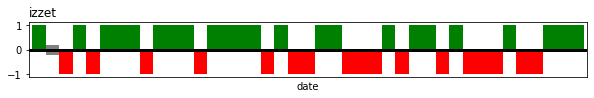

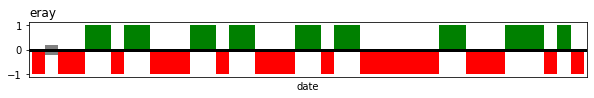

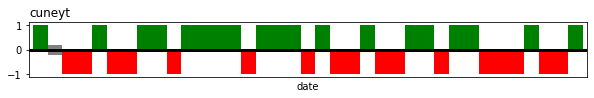

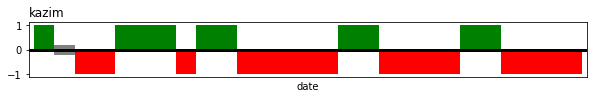

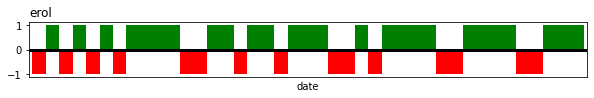

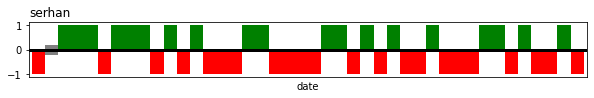

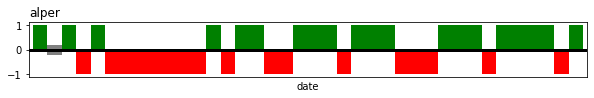

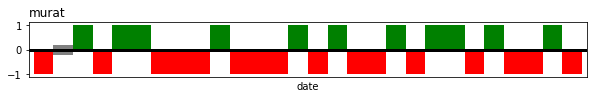

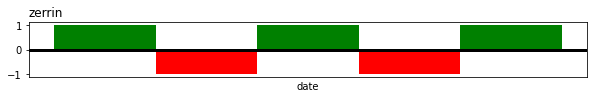

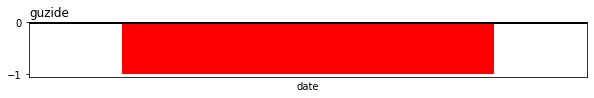

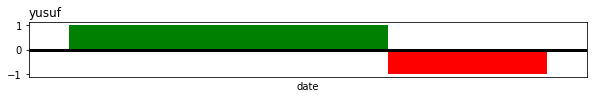

In [10]:
players = scores.drop_duplicates('player')['player']
for player in players:
    plot_win_lose_streaks(player)

## Rankings

Show and rank via win percentage for each player. Alternatives would be
 - total number of wins
 - total IMPs scored
 
but go with win percentages for now

In [11]:
rankings = scores.groupby('player').count().drop(['score'], axis=1)
# drop players with 3 games or less
rankings = rankings[rankings['result'] > 3]
rankings['pct'] = rankings['wins'] / rankings['result']
rankings = rankings.sort_values(by='pct', ascending=False)

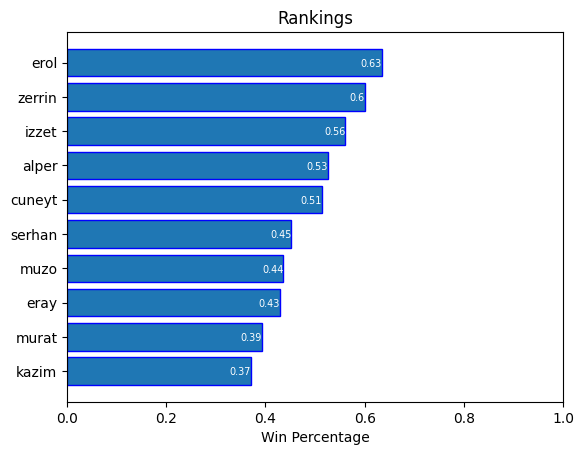

In [12]:
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(rankings))
ax.barh(y_pos, rankings['pct'], edgecolor='blue')
ax.set_yticks(y_pos, labels=list(rankings.index))
ax.invert_yaxis()  # highest first
ax.set_xlabel('Win Percentage')
ax.set_title('Rankings')

for i in range(len(rankings.index)):
    plt.text(rankings['pct'][i], y_pos[i], round(rankings['pct'][i],2), 
             ha='right', va='center_baseline', fontsize='x-small', color='white')

ax.set_xlim((0, 1))
plt.show()

## Confidence Intervals

In probability theory and statistics, the binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability p) or failure (with probability q = 1 − p).

Calculate the confidence interval for the win percentages above, i.e. the *correct* win percentage for each player lies somewhere in the interval calculated with a high probability.

In [13]:
from scipy.stats import binomtest

In [14]:
intervals = {}
for i in range(len(rankings.index)):
    result = binomtest(int(rankings.iloc[i]['wins']), int(rankings.iloc[i]['result']), rankings.iloc[i]['pct'], alternative='two-sided')
    intervals[rankings.index[i]] = result.proportion_ci(confidence_level=0.95)

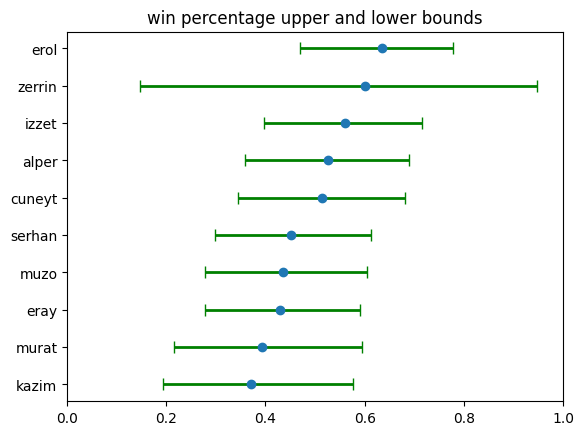

In [15]:
fig, ax = plt.subplots()
x = list()
y = list()
error_range = list()

# reverse for descending order
for i in range(len(intervals.keys())-1,-1, -1):
    # player, center, lower_limit, upper_limit
    # ('izzet', 0.6818181818181818, 0.451275572426236, 0.8613534784462099)
    lines = rankings.index[i], rankings['pct'][rankings.index[i]], intervals[rankings.index[i]][0], intervals[rankings.index[i]][1]
    x.append(lines[1])
    y.append(lines[0])
    error_range.append([lines[1]-lines[2], lines[3]-lines[1]])

ax.errorbar(x, y, xerr=np.array(error_range).T, fmt='o', ecolor='green', elinewidth=2, capsize=4)

# tidy up the figure
ax.set_xlim((0, 1))
ax.set_title('win percentage upper and lower bounds')
plt.show()

That makes sense. Cuneyt played less games than Izzet and hence his upper limit for his *true* percentage is higher.

However, let's not give too much importance to these confidence intervals as the underlying distribution shifts in time - we are improving our bridge playing skills presumably at different rates.  Still, confidence intervals are a nice reminder that the point win percentages are not the be-all and end-all in rankings, especially since the number of games played (n) is still too few in number.

## Rankings - Cont

Another ranking method is to use points for each game: 3 points for a win, 1 point for a draw and 0 points for a loss.

In [16]:
def calculate_points(a: float, b: float) -> tuple[int, int]:
    '''
    gets scores for team1 and team2
    returns team points:
      3 for a win
      1 for a draw
      0 for a loss
    '''
    if a > b:
        return 3, 0
    elif a == b:
        return 1, 1
    else:
        return 0, 3

scores = pd.DataFrame()
columns = ['date', 'player', 'score', 'points']
scores = player_stats(raw_scores, scores, calculate_points, columns, columns[0])
scores

,player,score,points
date,,,
2022-03-22,muzo,7,0
2022-03-22,izzet,16,3
2022-03-22,eray,7,0
2022-03-22,cuneyt,16,3
2022-03-22,kazim,7,0
...,...,...,...
2021-10-26,kazim,32,3
2021-10-26,murat,15,0
2021-10-26,alper,32,3


add up the points earned to form a league table

In [17]:
league = pd.DataFrame()
league['points_total'] = scores.groupby(by="player")['points'].sum()
league['games_played'] = scores.groupby(by="player")['points'].count()
#league['points_per_game'] = league['points_total'] / league['games_played']
league.sort_values(by=['points_total'], ascending=False, inplace=True)

league

,points_total,games_played
player,,
erol,78,41
izzet,70,41
alper,61,38
cuneyt,58,37
serhan,58,42
eray,55,42
muzo,52,39
murat,34,28
kazim,31,27


### With Decay

Another ranking option would be behave similar to above (3/1/0 points for win/draw/lose) but decay the points earned and then rank accordingly, i.e. recent games played are more valuable than earlier games - let's call this the Muzo option :)

In [18]:
alpha = 0.2 # lose 20% of your value in 30 days
latest = raw_scores.date.max()

decayed_scores = pd.DataFrame()
for i in range(len(raw_scores)):
    team1_members = list(raw_scores.iloc[i].team1.split('-'))
    team2_members = list(raw_scores.iloc[i].team2.split('-'))

    # team1 and team2 are the same length
    for j in range(len(team1_members)):
        team1_score, team2_score = calculate_points(raw_scores.iloc[i].imp1, raw_scores.iloc[i].imp2)
        team1_series = pd.Series([raw_scores.iloc[i].date, 
                                  team1_members[j],
                                  raw_scores.iloc[i].imp1, 
                                  team1_score * pow((1-alpha),(latest - raw_scores.iloc[i].date).days/30)],
                                 name='team1')
        team2_series = pd.Series([raw_scores.iloc[i].date, 
                                  team2_members[j], 
                                  raw_scores.iloc[i].imp2, 
                                  team2_score * pow((1-alpha),(latest - raw_scores.iloc[i].date).days/30)], 
                                 name='team2')
        decayed_scores = pd.concat([decayed_scores, team1_series.to_frame('team1').T, team2_series.to_frame('team2').T], ignore_index=True)

columns = ['date', 'player', 'score', 'points']
decayed_scores.columns = columns
decayed_scores.set_index('date', inplace=True)

In [19]:
decayed_league = pd.DataFrame()
decayed_league['points_total'] = decayed_scores.groupby(by="player")['points'].sum()
decayed_league['games_played'] = decayed_scores.groupby(by="player")['points'].count()
decayed_league.sort_values(by=['points_total'], ascending=False, inplace=True)

decayed_league

,points_total,games_played
player,,
erol,51.210907,41
alper,42.26844,38
izzet,41.686938,41
cuneyt,34.963654,37
serhan,34.962291,42
eray,34.917597,42
muzo,32.748757,39
murat,20.249223,28
kazim,15.352257,27


so the above is the rankings with alpha = 0.2, i.e. we lose 20% of the points earned every 30 days.

Choosing alpha as 0.2 is reasonable but arbitrary, so calculate the rankings for different alpha values

In [20]:
def calculate_decayed_rankings(raw_scores, alpha, latest):
    decayed_scores = pd.DataFrame()
    for i in range(len(raw_scores)):
        team1_members = list(raw_scores.iloc[i].team1.split('-'))
        team2_members = list(raw_scores.iloc[i].team2.split('-'))

        # team1 and team2 are the same length
        for j in range(len(team1_members)):
            team1_score, team2_score = calculate_points(raw_scores.iloc[i].imp1, raw_scores.iloc[i].imp2)
            team1_series = pd.Series([raw_scores.iloc[i].date, 
                                      team1_members[j],
                                      raw_scores.iloc[i].imp1, 
                                      team1_score * pow((1-alpha),(latest - raw_scores.iloc[i].date).days/30)],
                                     name='team1')
            team2_series = pd.Series([raw_scores.iloc[i].date, 
                                      team2_members[j], 
                                      raw_scores.iloc[i].imp2, 
                                      team2_score * pow((1-alpha),(latest - raw_scores.iloc[i].date).days/30)], 
                                     name='team2')
            decayed_scores = pd.concat([decayed_scores, team1_series.to_frame('team1').T, team2_series.to_frame('team2').T], ignore_index=True)

    columns = ['date', 'player', 'score', 'points']
    decayed_scores.columns = columns
    decayed_scores.set_index('date', inplace=True)
    
    decayed_league = pd.DataFrame()
    decayed_league['points_total'] = decayed_scores.groupby(by="player")['points'].sum()
    decayed_league['games_played'] = decayed_scores.groupby(by="player")['points'].count()
    # drop players with 3 games or less
    decayed_league = decayed_league[decayed_league['games_played'] > 3]
    decayed_league.sort_values(by=['points_total'], ascending=False, inplace=True)

    return decayed_league['points_total'].rank(ascending=False, method='average')

In [21]:
alphas = np.arange(0.1, 1, 0.1)
league_with_alpha = pd.DataFrame()

for alpha in alphas:
    league_with_alpha[alpha] = calculate_decayed_rankings(raw_scores, alpha, latest).to_frame()

league_with_alpha

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
player,,,,,,,,,
erol,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
izzet,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
alper,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
cuneyt,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
serhan,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
eray,6.0,6.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
muzo,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,8.0
murat,8.0,8.0,8.0,8.0,8.0,8.0,8.0,9.0,9.0
kazim,9.0,9.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0


and perhaps to aid the understanding of how alpha values affect rankings, a visual:

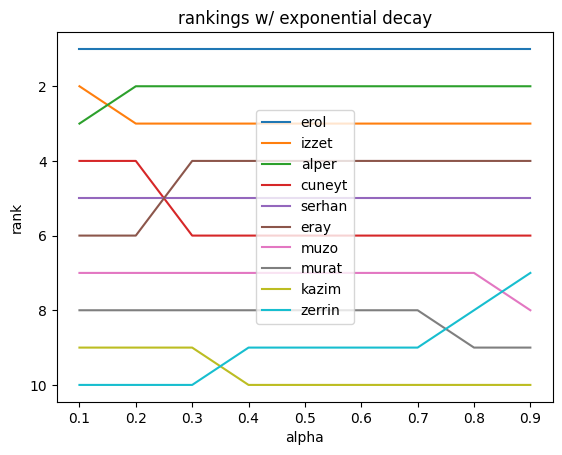

In [22]:
ax = league_with_alpha.transpose().plot(xlabel='alpha', ylabel='rank', title='rankings w/ exponential decay')
plt.gca().invert_yaxis()
plt.legend(loc='center')
plt.show()

This is a nice graph in that it gives a sense of who has done well recently and historically. Also, please keep in mind that this is a ranking and the standings are with respect to other players and not with respect to an objective metric.

## YS Rankings

Yusuf Sohtorik is an excellent bridge player.  He suggested using victory points for rankings.  Apparently, there is some history in victory points - gory details at the [WBF Site](http://www.worldbridge.org/resources/official-documents/wbf-victory-point-scales/). Basically, bridge games result in points which result in IMPs which result in VPs.  Each step more or less normalizes the results of the prior step.

In [23]:
def calculate_vps(score1: int, score2: int, games: int) -> tuple[float, float]:
    # formula from:
    # http://www.worldbridge.org/wp-content/uploads/2019/06/VP-Scale-Functiondetails.pdf
    tau = (5**0.5-1)/2
    M = abs(score1-score2)
    B = 15*(games**0.5)
    winner = round(min(20, 10 + 10*((1-tau**(3*M/B))/(1-tau**3))),2)
    loser = round(20 - winner, 2)
    return (winner, loser) if score1 > score2 else (loser, winner)

#calculate_vps(14, 8, 8)

In [24]:
vp_scores = pd.DataFrame()

for i in range(len(raw_scores)):
    team1_members = list(raw_scores.iloc[i].team1.split('-'))
    team2_members = list(raw_scores.iloc[i].team2.split('-'))

    # team1 and team2 are the same length
    for j in range(len(team1_members)):
        team1_score, team2_score = calculate_vps(raw_scores.iloc[i].imp1, raw_scores.iloc[i].imp2, raw_scores.iloc[i].hands_played)
        team1_series = pd.Series([raw_scores.iloc[i].date, 
                                  team1_members[j], 
                                  team1_score],
                                 name='team1')
        team2_series = pd.Series([raw_scores.iloc[i].date, 
                                  team2_members[j], 
                                  team2_score], 
                                 name='team2')
        vp_scores = pd.concat([vp_scores, team1_series.to_frame('team1').T, team2_series.to_frame('team2').T], ignore_index=True)

columns = ['date', 'player', 'points']
vp_scores.columns = columns
vp_scores.set_index('date', inplace=True)

league = pd.DataFrame()
league['victory_points'] = vp_scores.groupby(by="player")['points'].sum()
league['games_played'] = vp_scores.groupby(by="player")['points'].count()
# drop players with 3 games or less
league = league[league['games_played'] > 3]
league['vp_per_game'] = round((league['victory_points'] / league['games_played']).astype(float), 2)
league.sort_values(by=['victory_points'], ascending=False, inplace=True)
league

,victory_points,games_played,vp_per_game
player,,,
erol,468.02,41,11.42
izzet,438.5,41,10.70
alper,432.82,38,11.39
eray,392.67,42,9.35
serhan,389.02,42,9.26
cuneyt,377.94,37,10.21
muzo,377.64,39,9.68
kazim,239.38,27,8.87
murat,238.53,28,8.52


or better yet, let's not penalize missing some game nights - there is family, work, i.e. real life stuff that we are all responsible for, right?

In [25]:
league.sort_values(by=['vp_per_game'], ascending=False)

,victory_points,games_played,vp_per_game
player,,,
zerrin,57.76,5,11.55
erol,468.02,41,11.42
alper,432.82,38,11.39
izzet,438.5,41,10.70
cuneyt,377.94,37,10.21
muzo,377.64,39,9.68
eray,392.67,42,9.35
serhan,389.02,42,9.26
kazim,239.38,27,8.87


Same as above, but now with alpha decay for victory points per game:

EDIT: Apparently, victory points per game has its downsides as well.  A new player can junk the rankings by winning relatively a small number of games.  One way around that problem would be to put restrictions on the minumum number of games played (something like 30% of last 30 games - we did have a look at [NBA](https://www.nba.com/stats/help/statminimums/) for inspiration) but that just makes this a closed group which is again not something that we would like.

So we are going with victory points for now for our rankings as it seem to be a better representation of the status.

In [26]:
def calculate_decayed_vp_rankings(raw_scores, alpha, latest):
    decayed_scores = pd.DataFrame()
    for i in range(len(raw_scores)):
        team1_members = list(raw_scores.iloc[i].team1.split('-'))
        team2_members = list(raw_scores.iloc[i].team2.split('-'))

        # team1 and team2 are the same length
        for j in range(len(team1_members)):
            team1_score, team2_score = calculate_vps(raw_scores.iloc[i].imp1, raw_scores.iloc[i].imp2, raw_scores.iloc[i].hands_played)
            team1_series = pd.Series([raw_scores.iloc[i].date, 
                                      team1_members[j], 
                                      team1_score * pow((1-alpha),(latest - raw_scores.iloc[i].date).days/30)],
                                     name='team1')
            team2_series = pd.Series([raw_scores.iloc[i].date, 
                                      team2_members[j], 
                                      team2_score * pow((1-alpha),(latest - raw_scores.iloc[i].date).days/30)], 
                                     name='team2')
            decayed_scores = pd.concat([decayed_scores, team1_series.to_frame('team1').T, team2_series.to_frame('team2').T], ignore_index=True)

    columns = ['date', 'player', 'points']
    decayed_scores.columns = columns
    decayed_scores.set_index('date', inplace=True)
    
    decayed_league = pd.DataFrame()
    decayed_league['victory_points'] = decayed_scores.groupby(by="player")['points'].sum()
    decayed_league['games_played'] = decayed_scores.groupby(by="player")['points'].count()
    # drop players with 3 games or less
    decayed_league = decayed_league[decayed_league['games_played'] > 3]
    decayed_league['vp_per_game'] = round((decayed_league['victory_points'] / decayed_league['games_played']).astype(float), 2)
    decayed_league.sort_values(by=['victory_points'], ascending=False, inplace=True)

    return decayed_league['victory_points'].rank(ascending=False, method='min')

alphas = np.arange(0.1, 1, 0.1)
league_with_alpha = pd.DataFrame()

for alpha in alphas:
    league_with_alpha[alpha] = calculate_decayed_vp_rankings(raw_scores, alpha, latest).to_frame()

league_with_alpha

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
player,,,,,,,,,
erol,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
alper,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
izzet,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0
eray,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0
serhan,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,6.0
cuneyt,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
muzo,7.0,7.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0
murat,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,9.0
kazim,9.0,9.0,9.0,9.0,9.0,10.0,10.0,10.0,10.0


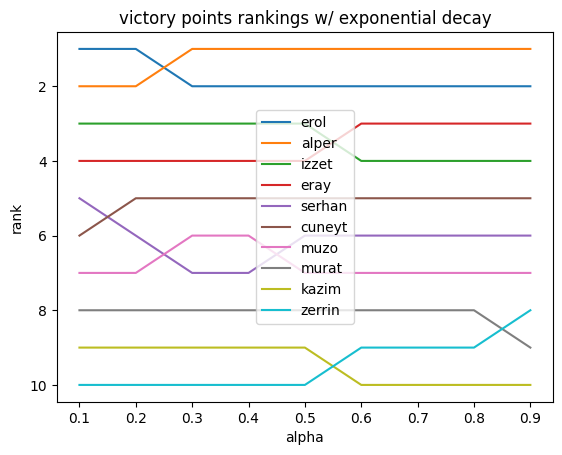

In [27]:
ax = league_with_alpha.transpose().plot(xlabel='alpha', ylabel='rank', title='victory points rankings w/ exponential decay')
plt.gca().invert_yaxis()
plt.legend(loc='center')
plt.show()

and there you have it guys and gals!

I must also say that the results are somewhat surprising. And I guess this is a good thing. New and somewhat objective information gathered. Achievement unlocked!